In [3]:
from langgraph.graph import StateGraph,START,END
from typing import TypedDict


c:\Users\samar\anaconda3\envs\agent_env\Lib\site-packages\langchain_core\_api\deprecation.py:25: UserWarning: Core Pydantic V1 functionality isn't compatible with Python 3.14 or greater.
  from pydantic.v1.fields import FieldInfo as FieldInfoV1


In [4]:
class BatsmanStats(TypedDict):
    runs: int
    balls_faced: int
    fours: int
    sixes: int
    
    sr:float 
    bpb : float
    boundry_percentage: float
    summary: str

In [10]:
def cal_strike_rate(state: BatsmanStats):
    state['sr'] = (state['runs'] / state['balls_faced']) * 100
    return {'sr': state['sr']}

In [11]:
def cal_balls_per_boundary(state: BatsmanStats) :
    total_boundaries = state['fours'] + state['sixes']
    if total_boundaries > 0:
        state['bpb'] = state['balls_faced'] / total_boundaries
    else:
        state['bpb'] = float('inf')  # No boundaries hit
    return {'bpb': state['bpb']}

In [12]:
def cal_boundary_percentage(state: BatsmanStats) :
    total_boundaries = state['fours'] + state['sixes']
    state['boundry_percentage'] = (total_boundaries / state['balls_faced']) * 100
    return {'boundry_percentage': state['boundry_percentage']}

In [17]:
def summary(state: BatsmanStats) :
    state['summary'] = (f"Batsman scored {state['runs']} runs off {state['balls_faced']} balls "
                        f"with a strike rate of {state['sr']:.2f}. \n"
                        f"He hit {state['fours']} fours and {state['sixes']} sixes, \n "
                        f"resulting in a boundary percentage of {state['boundry_percentage']:.2f}% "
                        f"and a balls per boundary of {state['bpb']:.2f}.")
    return {'summary': state['summary']}

In [19]:
graph = StateGraph(BatsmanStats)

graph.add_node('calc strike_rate',cal_strike_rate) 
graph.add_node('calc balls_per_boundary',cal_balls_per_boundary) 
graph.add_node('calc boundary_percentage',cal_boundary_percentage)
graph.add_node('summary',summary)  

graph.add_edge(START,'calc strike_rate')
graph.add_edge(START,'calc balls_per_boundary')
graph.add_edge(START,'calc boundary_percentage')

graph.add_edge('calc strike_rate','summary')
graph.add_edge('calc balls_per_boundary','summary')
graph.add_edge('calc boundary_percentage','summary')

graph.add_edge('summary',END)

workflow = graph.compile()

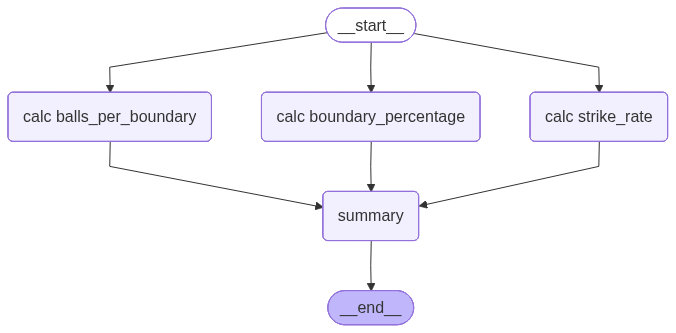

In [20]:
workflow

In [21]:
intial_state = {
    'runs': 107,
    'balls_faced': 60,
    'fours': 8,
    'sixes': 6
    }
final_state = workflow.invoke(intial_state)
final_state['summary']

'Batsman scored 107 runs off 60 balls with a strike rate of 178.33. \nHe hit 8 fours and 6 sixes, \n resulting in a boundary percentage of 23.33% and a balls per boundary of 4.29.'